Importing necessary libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style for visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

Loading and Exploring the Data
First, let's load the dataset and examine its structure.

In [2]:
df = pd.read_csv('marketing_campaign_dataset.csv')

In [3]:
#df.head()
df.info()
#df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15  Date              200000 non-null  object 
dtypes: float64(2), int64

1. Most Effective and Least Effective Channels and Strategies
Let's analyze performance by channels and campaign types.


Channel Performance:
              Conversion_Rate       ROI      Clicks  Engagement_Score
Channel_Used                                                         
Facebook             0.079992  5.018699  549.619032          5.503702
Website              0.080183  5.014167  551.997242          5.508903
Google Ads           0.080183  5.003141  548.501914          5.494049
Email                0.080282  4.996487  550.431947          5.487842
YouTube              0.079889  4.993754  549.545011          5.484937
Instagram            0.079886  4.988706  548.534200          5.489039


C:\Users\jerome\AppData\Local\Temp\ipykernel_16004\819485870.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_performance.index, y='ROI', data=channel_performance, palette='viridis')


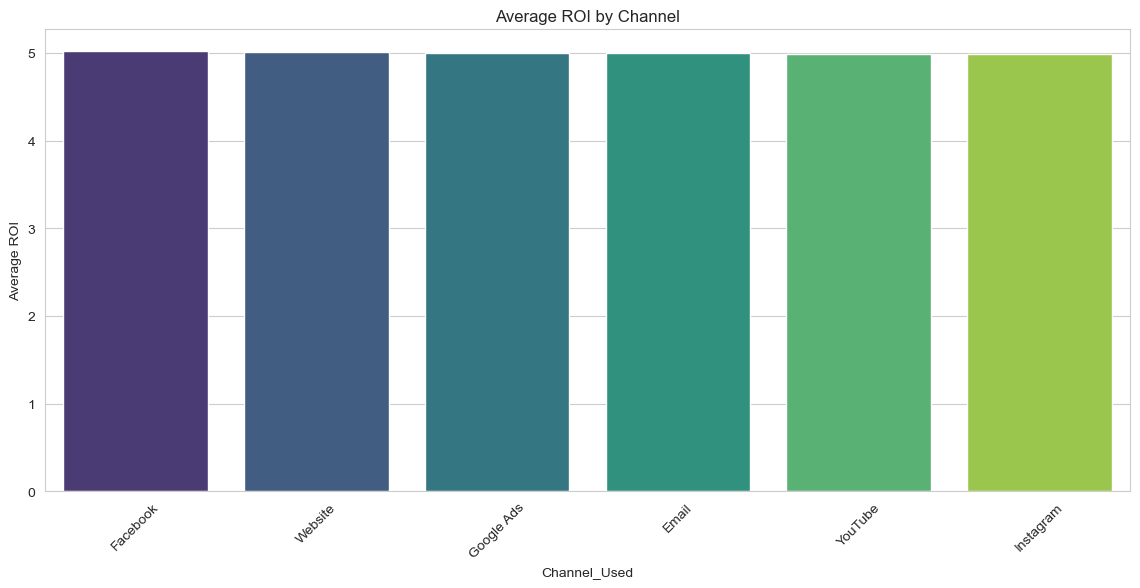


Campaign Type Performance:
               Conversion_Rate       ROI      Clicks  Engagement_Score
Campaign_Type                                                         
Influencer            0.080315  5.011068  548.623491          5.483134
Search                0.080021  5.008357  548.650148          5.487138
Display               0.080089  5.006551  550.953535          5.505889
Email                 0.079788  4.994295  549.232556          5.499624
Social Media          0.080135  4.991784  551.415827          5.497878


C:\Users\jerome\AppData\Local\Temp\ipykernel_16004\819485870.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=campaign_type_performance.index, y='ROI', data=campaign_type_performance, palette='magma')


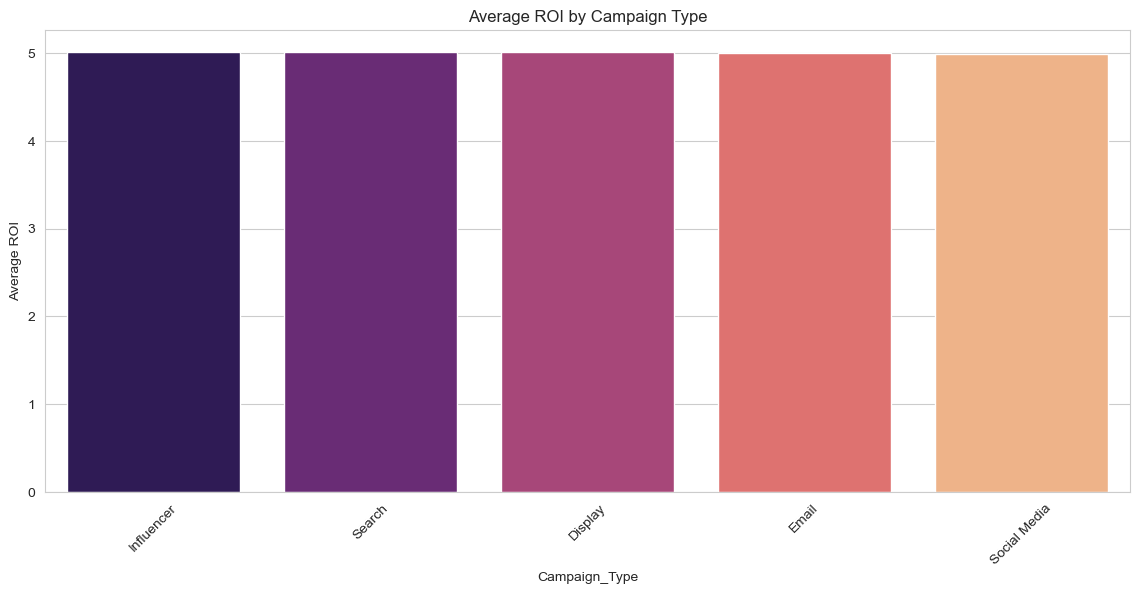

In [4]:
# Group by channels and calculate mean metrics
channel_performance = df.groupby('Channel_Used').agg({
    'Conversion_Rate': 'mean',
    'ROI': 'mean',
    'Clicks': 'mean',
    'Engagement_Score': 'mean'
}).sort_values('ROI', ascending=False)

print("\nChannel Performance:")
print(channel_performance)

# Visualize channel performance
plt.figure(figsize=(14, 6))
sns.barplot(x=channel_performance.index, y='ROI', data=channel_performance, palette='viridis')
plt.title('Average ROI by Channel')
plt.ylabel('Average ROI')
plt.xticks(rotation=45)
plt.show()

# Group by campaign type and calculate mean metrics
campaign_type_performance = df.groupby('Campaign_Type').agg({
    'Conversion_Rate': 'mean',
    'ROI': 'mean',
    'Clicks': 'mean',
    'Engagement_Score': 'mean'
}).sort_values('ROI', ascending=False)

print("\nCampaign Type Performance:")
print(campaign_type_performance)

# Visualize campaign type performance
plt.figure(figsize=(14, 6))
sns.barplot(x=campaign_type_performance.index, y='ROI', data=campaign_type_performance, palette='magma')
plt.title('Average ROI by Campaign Type')
plt.ylabel('Average ROI')
plt.xticks(rotation=45)
plt.show()

2. Elements That Resonated Most with Target Audience
Let's analyze which combinations of elements performed best with each audience.


Audience Performance:
                 Conversion_Rate       ROI  Engagement_Score
Target_Audience                                             
Men 25-34               0.080132  5.020627          5.491942
Women 35-44             0.080102  5.006330          5.486507
All Ages                0.079975  5.005174          5.487094
Women 25-34             0.079899  4.997351          5.492740
Men 18-24               0.080240  4.982853          5.515078


C:\Users\jerome\AppData\Local\Temp\ipykernel_16004\219162669.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=audience_performance.index, y='ROI', data=audience_performance, palette='rocket')


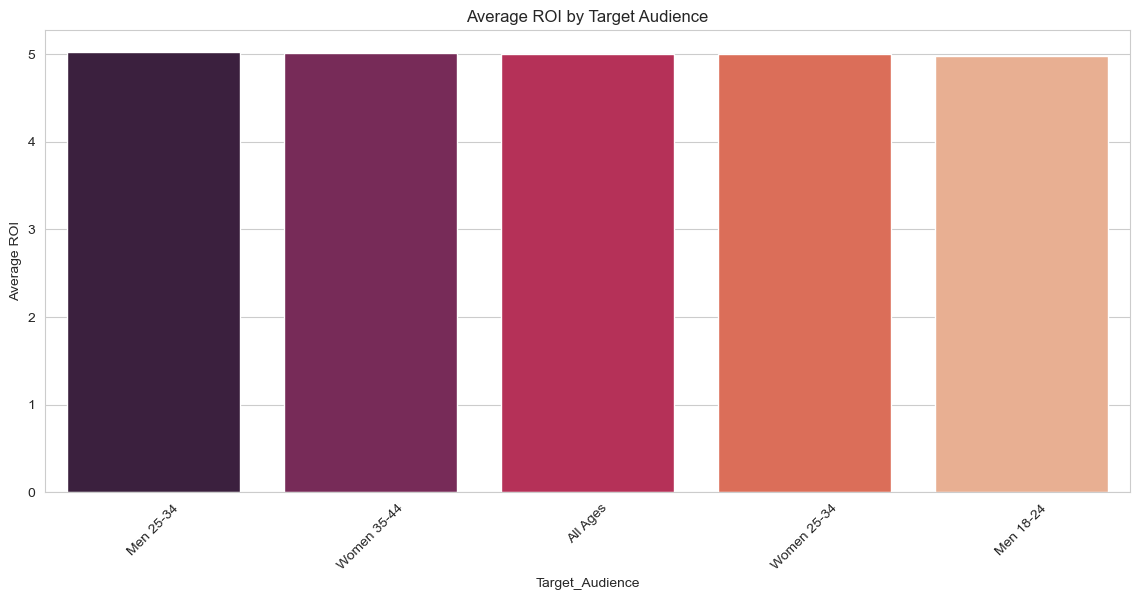


Best Campaign Types by Audience:
Campaign_Type     Display     Email  Influencer    Search  Social Media
Target_Audience                                                        
All Ages         5.016460  5.031313    5.007366  4.990011      4.980952
Men 18-24        5.005359  4.976120    4.977951  4.995139      4.959450
Men 25-34        4.983207  5.013440    5.018447  5.044198      5.043380
Women 25-34      4.991677  4.991366    5.044664  4.986857      4.973634
Women 35-44      5.036117  4.959973    5.008438  5.025550      5.001781


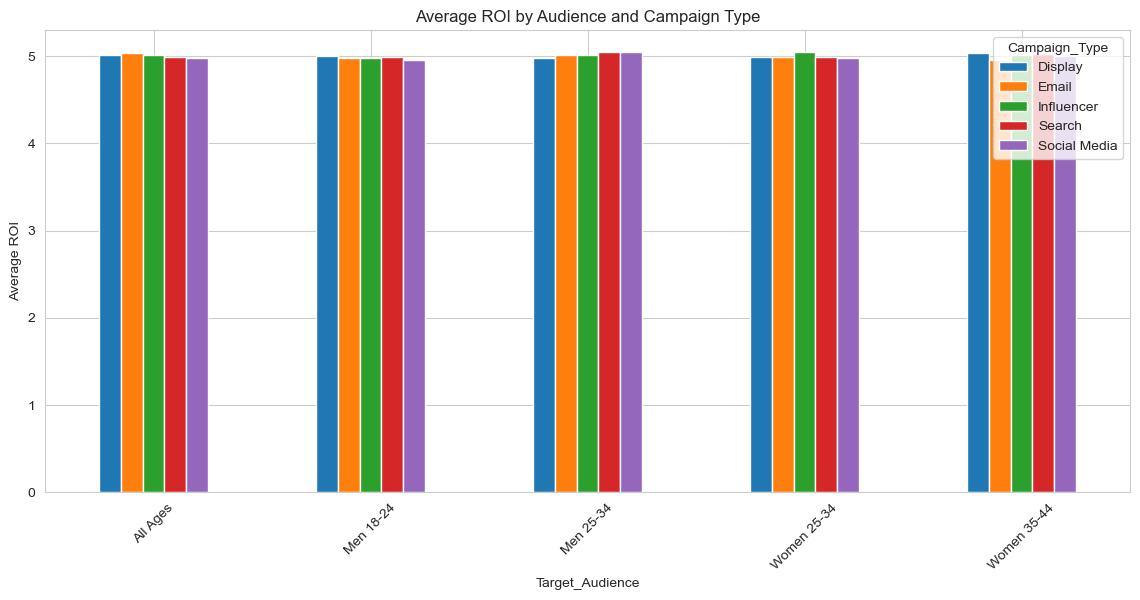

In [5]:
# Analyze performance by target audience and campaign elements
audience_performance = df.groupby('Target_Audience').agg({
    'Conversion_Rate': 'mean',
    'ROI': 'mean',
    'Engagement_Score': 'mean'
}).sort_values('ROI', ascending=False)

print("\nAudience Performance:")
print(audience_performance)

# Visualize audience performance
plt.figure(figsize=(14, 6))
sns.barplot(x=audience_performance.index, y='ROI', data=audience_performance, palette='rocket')
plt.title('Average ROI by Target Audience')
plt.ylabel('Average ROI')
plt.xticks(rotation=45)
plt.show()

# Analyze best performing campaign types for each audience
best_campaign_by_audience = df.groupby(['Target_Audience', 'Campaign_Type'])['ROI'].mean().unstack()
print("\nBest Campaign Types by Audience:")
print(best_campaign_by_audience)

# Visualize
best_campaign_by_audience.plot(kind='bar', figsize=(14, 6))
plt.title('Average ROI by Audience and Campaign Type')
plt.ylabel('Average ROI')
plt.xticks(rotation=45)
plt.show()

3. Key Performance Indicators (KPIs) and Performance
Let's evaluate the campaign against common KPIs.


KPI Performance vs Thresholds:
                KPI  Threshold       Actual  Difference
0   Conversion_Rate       0.08     0.080070    0.000070
1               ROI       5.00     5.002438    0.002438
2  Engagement_Score       5.00     5.494710    0.494710
3            Clicks     550.00   549.772030   -0.227970
4       Impressions    5500.00  5507.301520    7.301520


<Figure size 1400x600 with 0 Axes>

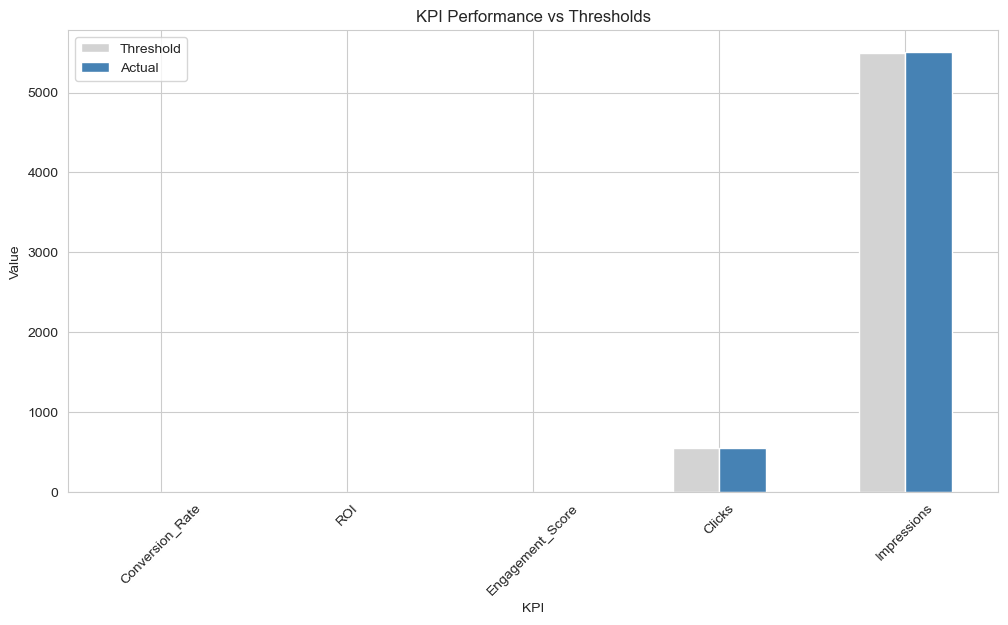

In [6]:
# Define KPI thresholds (these would be based on business goals in a real scenario)
kpi_thresholds = {
    'Conversion_Rate': 0.08,  # Average given in the problem
    'ROI': 5.0,  # Average given in the problem
    'Engagement_Score': 5.0,  # Midpoint of 1-10 scale
    'Clicks': 550,  # Average given in the problem
    'Impressions': 5500  # Average given in the problem
}

# Calculate actual performance
actual_performance = {
    'Conversion_Rate': df['Conversion_Rate'].mean(),
    'ROI': df['ROI'].mean(),
    'Engagement_Score': df['Engagement_Score'].mean(),
    'Clicks': df['Clicks'].mean(),
    'Impressions': df['Impressions'].mean()
}

# Create comparison DataFrame
kpi_comparison = pd.DataFrame({
    'KPI': list(kpi_thresholds.keys()),
    'Threshold': list(kpi_thresholds.values()),
    'Actual': list(actual_performance.values()),
    'Difference': [actual - threshold for actual, threshold in zip(actual_performance.values(), kpi_thresholds.values())]
})

print("\nKPI Performance vs Thresholds:")
print(kpi_comparison)

# Visualize KPI performance
plt.figure(figsize=(14, 6))
kpi_comparison.set_index('KPI')[['Threshold', 'Actual']].plot(kind='bar', color=['lightgray', 'steelblue'])
plt.title('KPI Performance vs Thresholds')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

4. Overall Return on Investment (ROI)


In [7]:
# Calculate overall ROI metrics
overall_roi = {
    'Average ROI': df['ROI'].mean(),
    'Median ROI': df['ROI'].median(),
    'Total ROI Sum': df['ROI'].sum(),
    'ROI Range': f"{df['ROI'].min()} to {df['ROI'].max()}"
}

print("\nOverall ROI Metrics:")
for metric, value in overall_roi.items():
    print(f"{metric}: {value}")


Overall ROI Metrics:
Average ROI: 5.00243785
Median ROI: 5.01
Total ROI Sum: 1000487.57
ROI Range: 2.0 to 8.0


5. Outperforming Campaigns or Elements

In [8]:
# Identify top 10 campaigns by ROI
top_campaigns = df.sort_values('ROI', ascending=False).head(10)
print("\nTop 10 Campaigns by ROI:")
print(top_campaigns[['Campaign_ID', 'Company', 'Campaign_Type', 'Target_Audience', 'Channel_Used', 'ROI']])

# Analyze common characteristics of top performers
top_performer_characteristics = {
    'Common Companies': top_campaigns['Company'].value_counts().index[0],
    'Common Campaign Types': top_campaigns['Campaign_Type'].value_counts().index[0],
    'Common Target Audiences': top_campaigns['Target_Audience'].value_counts().index[0],
    'Common Channel': top_campaigns['Channel_Used'].value_counts().index[0]
}

print("\nCommon Characteristics of Top Performers:")
for characteristic, value in top_performer_characteristics.items():
    print(f"{characteristic}: {value}")


Top 10 Campaigns by ROI:
        Campaign_ID              Company Campaign_Type Target_Audience  \
92842         92843  Innovate Industries         Email       Men 18-24   
170393       170394             TechCorp        Search     Women 35-44   
65236         65237             TechCorp        Search     Women 35-44   
72663         72664       NexGen Systems         Email       Men 25-34   
154174       154175   DataTech Solutions  Social Media        All Ages   
65640         65641    Alpha Innovations        Search     Women 25-34   
49606         49607   DataTech Solutions        Search       Men 25-34   
164935       164936       NexGen Systems  Social Media     Women 35-44   
73364         73365  Innovate Industries       Display       Men 25-34   
114352       114353   DataTech Solutions         Email        All Ages   

       Channel_Used  ROI  
92842       YouTube  8.0  
170393        Email  8.0  
65236    Google Ads  8.0  
72663      Facebook  8.0  
154174      Website  8.0

6. Target Audience Response


Audience Response Metrics:
                 Engagement_Score  Conversion_Rate      Clicks       ROI
Target_Audience                                                         
Men 18-24                5.515078         0.080240  548.879775  4.982853
Women 25-34              5.492740         0.079899  551.112064  4.997351
Men 25-34                5.491942         0.080132  550.042176  5.020627
All Ages                 5.487094         0.079975  548.871811  5.005174
Women 35-44              5.486507         0.080102  549.961398  5.006330


C:\Users\jerome\AppData\Local\Temp\ipykernel_16004\373114632.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=audience_response.index, y='Engagement_Score', data=audience_response, ax=axes[0, 0], palette='coolwarm')
C:\Users\jerome\AppData\Local\Temp\ipykernel_16004\373114632.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=audience_response.index, y='Conversion_Rate', data=audience_response, ax=axes[0, 1], palette='coolwarm')
C:\Users\jerome\AppData\Local\Temp\ipykernel_16004\373114632.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn

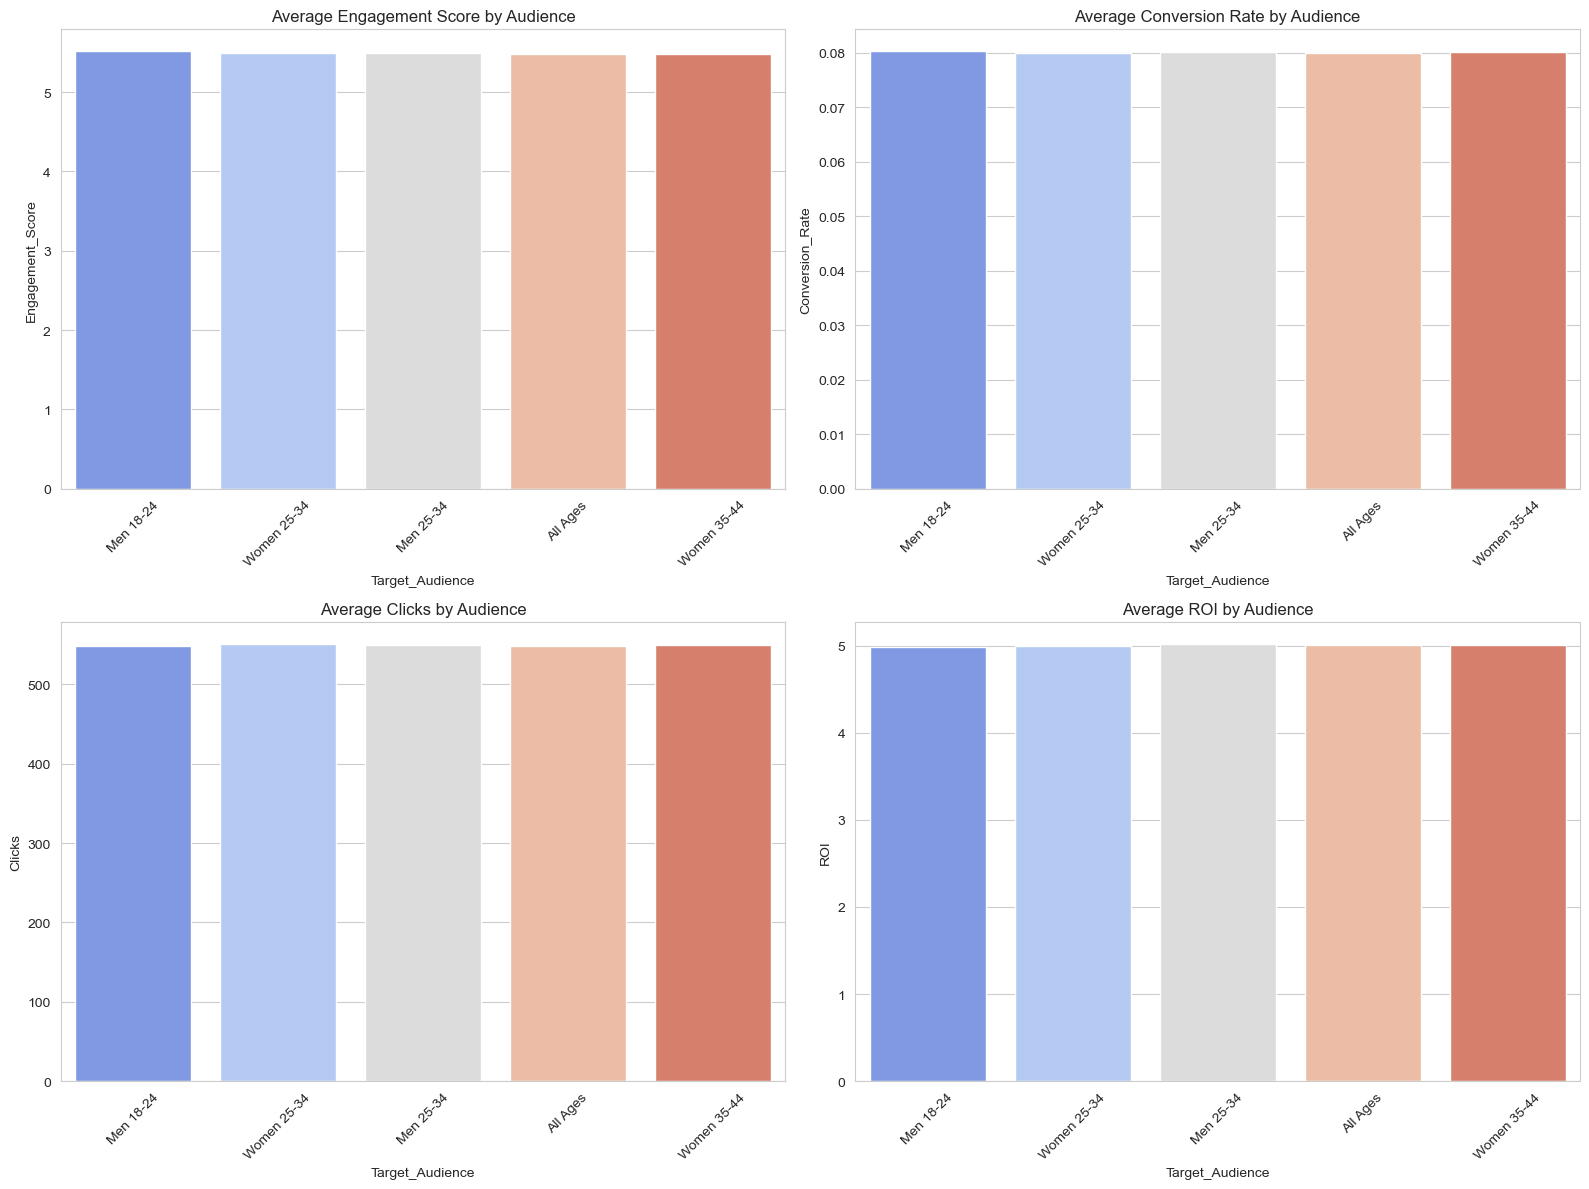

In [9]:
# Analyze audience response through engagement and conversion metrics
audience_response = df.groupby('Target_Audience').agg({
    'Engagement_Score': 'mean',
    'Conversion_Rate': 'mean',
    'Clicks': 'mean',
    'ROI': 'mean'
}).sort_values('Engagement_Score', ascending=False)

print("\nAudience Response Metrics:")
print(audience_response)

# Visualize audience response
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.barplot(x=audience_response.index, y='Engagement_Score', data=audience_response, ax=axes[0, 0], palette='coolwarm')
axes[0, 0].set_title('Average Engagement Score by Audience')
axes[0, 0].tick_params(axis='x', rotation=45)

sns.barplot(x=audience_response.index, y='Conversion_Rate', data=audience_response, ax=axes[0, 1], palette='coolwarm')
axes[0, 1].set_title('Average Conversion Rate by Audience')
axes[0, 1].tick_params(axis='x', rotation=45)

sns.barplot(x=audience_response.index, y='Clicks', data=audience_response, ax=axes[1, 0], palette='coolwarm')
axes[1, 0].set_title('Average Clicks by Audience')
axes[1, 0].tick_params(axis='x', rotation=45)

sns.barplot(x=audience_response.index, y='ROI', data=audience_response, ax=axes[1, 1], palette='coolwarm')
axes[1, 1].set_title('Average ROI by Audience')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

7. Engagement Metrics


Engagement Metrics:
Average Engagement Score: 5.49

Engagement Score Distribution:
Engagement_Score
1     0.100135
2     0.100565
3     0.099735
4     0.100705
5     0.100115
6     0.099410
7     0.099665
8     0.099720
9     0.100530
10    0.099420
Name: proportion, dtype: float64

Engagement by Campaign Type:
Campaign_Type
Display         5.505889
Email           5.499624
Social Media    5.497878
Search          5.487138
Influencer      5.483134
Name: Engagement_Score, dtype: float64

Engagement by Channel:
Channel_Used
Website       5.508903
Facebook      5.503702
Google Ads    5.494049
Instagram     5.489039
Email         5.487842
YouTube       5.484937
Name: Engagement_Score, dtype: float64


C:\Users\jerome\AppData\Local\Temp\ipykernel_16004\2962152602.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Engagement_Score', data=df, palette='viridis')


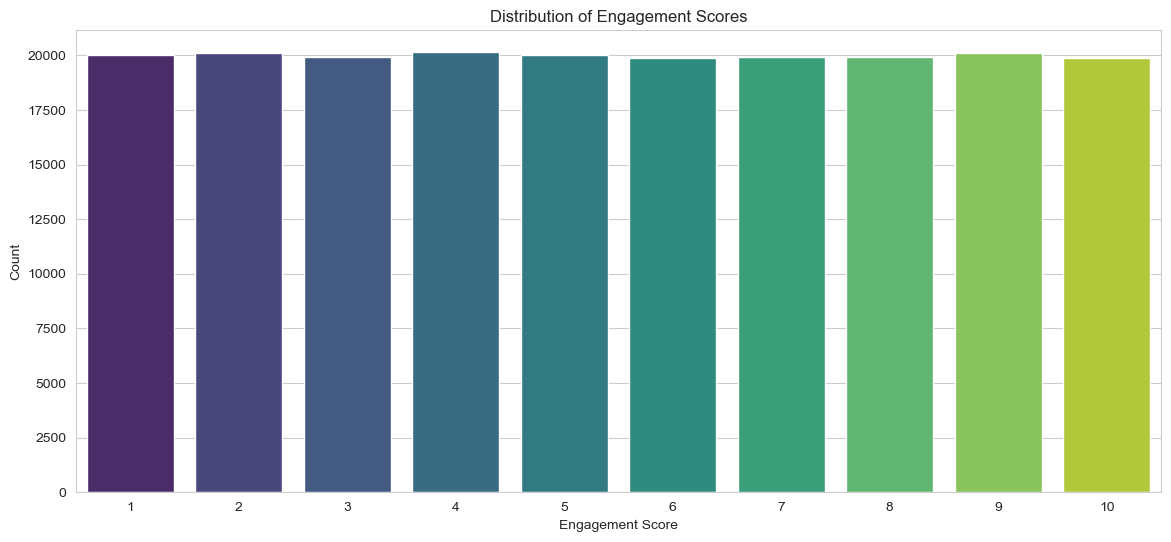

In [10]:
# Analyze engagement metrics
engagement_metrics = {
    'Average Engagement Score': df['Engagement_Score'].mean(),
    'Engagement Score Distribution': df['Engagement_Score'].value_counts(normalize=True).sort_index(),
    'Engagement by Campaign Type': df.groupby('Campaign_Type')['Engagement_Score'].mean().sort_values(ascending=False),
    'Engagement by Channel': df.groupby('Channel_Used')['Engagement_Score'].mean().sort_values(ascending=False)
}

print("\nEngagement Metrics:")
print(f"Average Engagement Score: {engagement_metrics['Average Engagement Score']:.2f}")
print("\nEngagement Score Distribution:")
print(engagement_metrics['Engagement Score Distribution'])
print("\nEngagement by Campaign Type:")
print(engagement_metrics['Engagement by Campaign Type'])
print("\nEngagement by Channel:")
print(engagement_metrics['Engagement by Channel'])

# Visualize engagement distribution
plt.figure(figsize=(14, 6))
sns.countplot(x='Engagement_Score', data=df, palette='viridis')
plt.title('Distribution of Engagement Scores')
plt.xlabel('Engagement Score')
plt.ylabel('Count')
plt.show()

8. Campaign Optimization Recommendations.
Based on the analysis, here are optimization recommendations:

In [12]:
# Remove '$' from Acquisition_Cost and convert the object to float
df['Acquisition_Cost'] = pd.to_numeric(df['Acquisition_Cost'].str.replace('$', '', regex=False), errors='coerce')


Correlation Matrix:
                  Conversion_Rate       ROI  Engagement_Score    Clicks  \
Conversion_Rate          1.000000 -0.001143         -0.000638  0.000269   
ROI                     -0.001143  1.000000          0.000588 -0.002040   
Engagement_Score        -0.000638  0.000588          1.000000 -0.001908   
Clicks                   0.000269 -0.002040         -0.001908  1.000000   
Impressions             -0.002834  0.002257          0.003030  0.000033   
Acquisition_Cost              NaN       NaN               NaN       NaN   

                  Impressions  Acquisition_Cost  
Conversion_Rate     -0.002834               NaN  
ROI                  0.002257               NaN  
Engagement_Score     0.003030               NaN  
Clicks               0.000033               NaN  
Impressions          1.000000               NaN  
Acquisition_Cost          NaN               NaN  


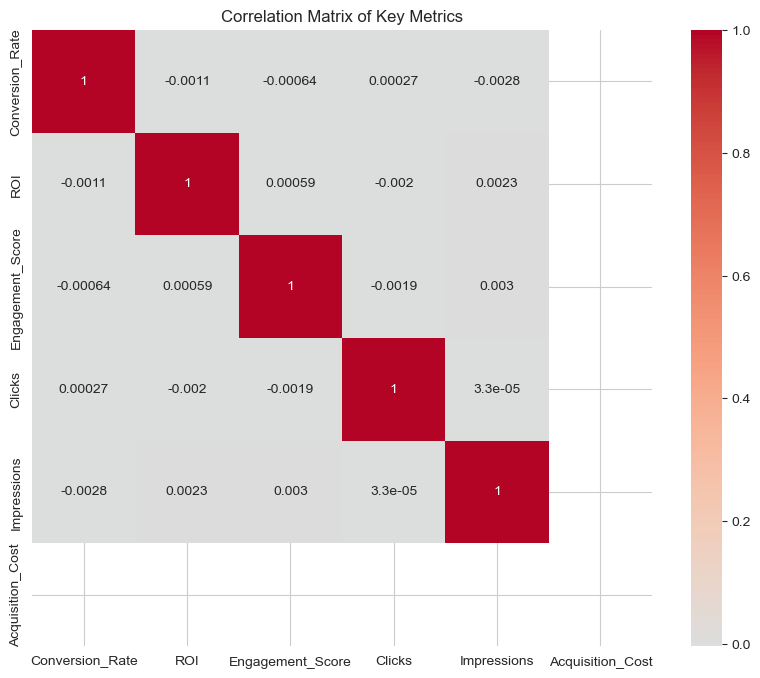

In [13]:
# Calculate correlations to identify optimization opportunities


correlation_matrix = df[['Conversion_Rate', 'ROI', 'Engagement_Score', 'Clicks', 'Impressions', 'Acquisition_Cost']].corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Key Metrics')
plt.show()

9. New Insights Discovered

In [14]:
# Discover additional insights through deeper analysis

# Insight 1: Interaction between language and location
language_location_performance = df.groupby(['Language', 'Location'])['ROI'].mean().unstack()
print("\nROI by Language and Location:")
print(language_location_performance)

# Insight 2: Performance by duration
duration_performance = df.groupby('Duration').agg({
    'ROI': 'mean',
    'Conversion_Rate': 'mean',
    'Engagement_Score': 'mean'
}).sort_values('ROI', ascending=False)
print("\nPerformance by Duration:")
print(duration_performance)

# Insight 3: Customer segment preferences
segment_performance = df.groupby('Customer_Segment').agg({
    'ROI': 'mean',
    'Engagement_Score': 'mean'
}).sort_values('ROI', ascending=False)
print("\nPerformance by Customer Segment:")
print(segment_performance)


ROI by Language and Location:
Location   Chicago   Houston  Los Angeles     Miami  New York
Language                                                     
English   4.987194  5.002508     4.994862  5.005725  4.963692
French    5.045077  5.000504     5.023914  5.017525  4.970030
German    4.985008  5.024291     5.017423  4.998350  4.980121
Mandarin  4.995719  5.010827     5.031411  5.011864  4.986262
Spanish   4.995625  4.997881     4.986205  5.028071  5.000856

Performance by Duration:
               ROI  Conversion_Rate  Engagement_Score
Duration                                             
30 days   5.008887         0.080177          5.505064
60 days   5.006480         0.080048          5.481510
45 days   4.997627         0.079952          5.489960
15 days   4.996720         0.080101          5.502260

Performance by Customer Segment:
                          ROI  Engagement_Score
Customer_Segment                               
Foodies              5.004376          5.511465
Tech En

10. Future Optimization Strategies

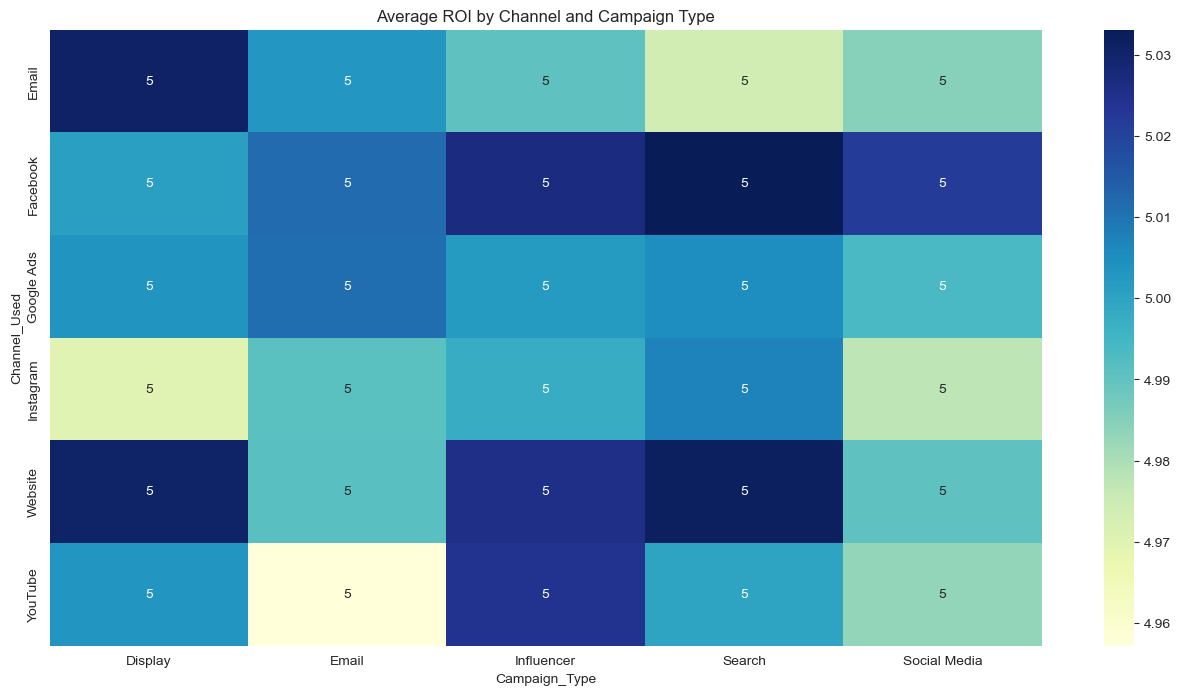

In [15]:
# Final summary visualization
summary_metrics = df.groupby(['Channel_Used', 'Campaign_Type']).agg({
    'ROI': 'mean',
    'Conversion_Rate': 'mean',
    'Engagement_Score': 'mean'
}).unstack()

plt.figure(figsize=(16, 8))
sns.heatmap(summary_metrics['ROI'], annot=True, cmap='YlGnBu')
plt.title('Average ROI by Channel and Campaign Type')
plt.show()